In [34]:
#imports
import numpy as np
import matplotlib.pyplot as plt

<font size="18"> Lesson 12 Presentation - Scheduling and Decision Analysis with Uncertainty (Project)</font>

For the final project, we're going to combine concepts from Lesson 3 (Scheduling), Lesson 10 (Simulation), and Lesson 11 (Decision Analysis). We'll do this by revisiting the scheduling problem from Lesson 3. But, we're going to make it a little more true-to-life by acknowledging some of the uncertainty in our estimates, and using simulation to help us come up with better estimates. We'll use our estimated profits to construct a payoff table and make a decision about how to proceed with the building project. We'll introduce more uncertainty around the possible presence of artifacts.

There are a few concepts that we'll introduce you to for this project. Most of the concepts you should have already learned in prior lessons.

# Triangular distributions

In this homework we'll use the <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html">*numpy random triangular*</a> function to draw samples from triangular distributions. The triangular distribution function expects a left, mode (middle), and right number as seeds, and it draws from a continuous distribution between the left and right values, with the middle value being the mode that defines the shape of the triangle. Let's look at a plot of a triangular distribution.

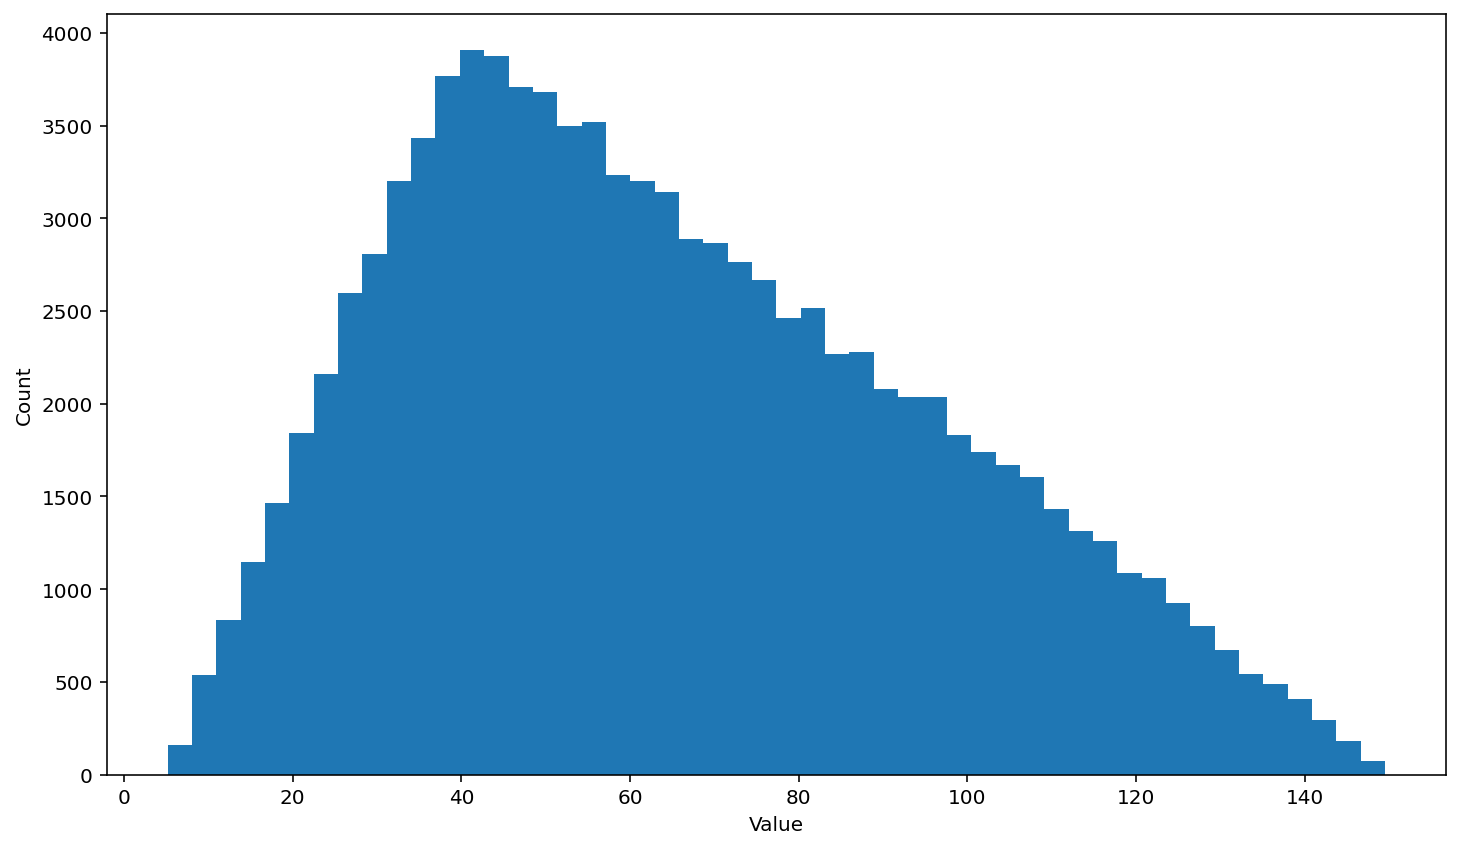

In [39]:
np.random.seed(121)
tri = np.random.triangular(5,40,150, size=100000)
n, bins, patches = plt.hist(tri, 50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

You can see that it's a generally triangular-shaped distribution with the peak near the mode value.

Let's look at an example of how that works for drawing a single value. 

Note that we'll need integers as values, so we'll use <a href="https://www.w3schools.com/python/ref_func_int.asp">python's int</a> function or <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html">numpy's astype</a> function to convert the value to an integer. These functions use the floor (rounding down), but since these are estimates anyway, that's okay. Note that we are setting a seed immediately prior to each call to numpy's triangular distribution so that we return the same number. In your homework, you'll want to set the seed just once at the top of the cell.

In [42]:
np.random.seed(121)
#lmr stands for the left, mode, and right side of the triangle
lmr = (7, 14, 21)

#to draw a single value
thisVal = np.random.triangular(lmr[0], lmr[1], lmr[2])
print(f'The single value is {thisVal}')

#we need integer values, so let's round
np.random.seed(121)
thisVal = int(np.random.triangular(lmr[0], lmr[1], lmr[2]))
print(f'The single value is {thisVal}')



The single value is 10.303092663628126
The single value is 10


In the homework, you'll need to do a loop of simSize to fetch unique values for each iteration of the loop. Let's see an example of how that can work with a loop, setting the seed just once, so that each iteration of the loop returns a different number.

In [43]:
#set a seed
np.random.seed(12)

#set a simSize
simSize = 5
#lmr stands for the left, mode, and right side of the triangle
lmr = (7, 14, 21)

#loop through the simSize
for i in range(simSize):
    thisVal = int(np.random.triangular(lmr[0], lmr[1], lmr[2]))
    print(f'The single value is {thisVal}')
    

The single value is 10
The single value is 15
The single value is 12
The single value is 14
The single value is 8


Let's see an example of how that can work with a vector. Again, we'll set the seed just once at the top of the cell.

In [44]:
#set a seed
np.random.seed(12)

#set a simSize
simSize = 5
#lmr stands for the left, mode, and right side of the triangle
lmr = (7, 14, 21)
allVals = np.random.triangular(lmr[0], lmr[1], lmr[2], size=simSize).astype('int')

#loop through the simSize
for i in range(simSize):
    print(f'The value is {allVals[i]}') #fetch the value associated with this loop iteration

The value is 10
The value is 15
The value is 12
The value is 14
The value is 8


Note the either way, if we set a seed once at the top of the cell, we should get a consistent list of values.

# Exponential Distributions

For the second part of the homework, you'll need to draw a sample from <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html">an exponential distribution</a>. The exponential distribution takes in the scale (the mean) of the distribution. Let's see what an exponential distribution looks like.

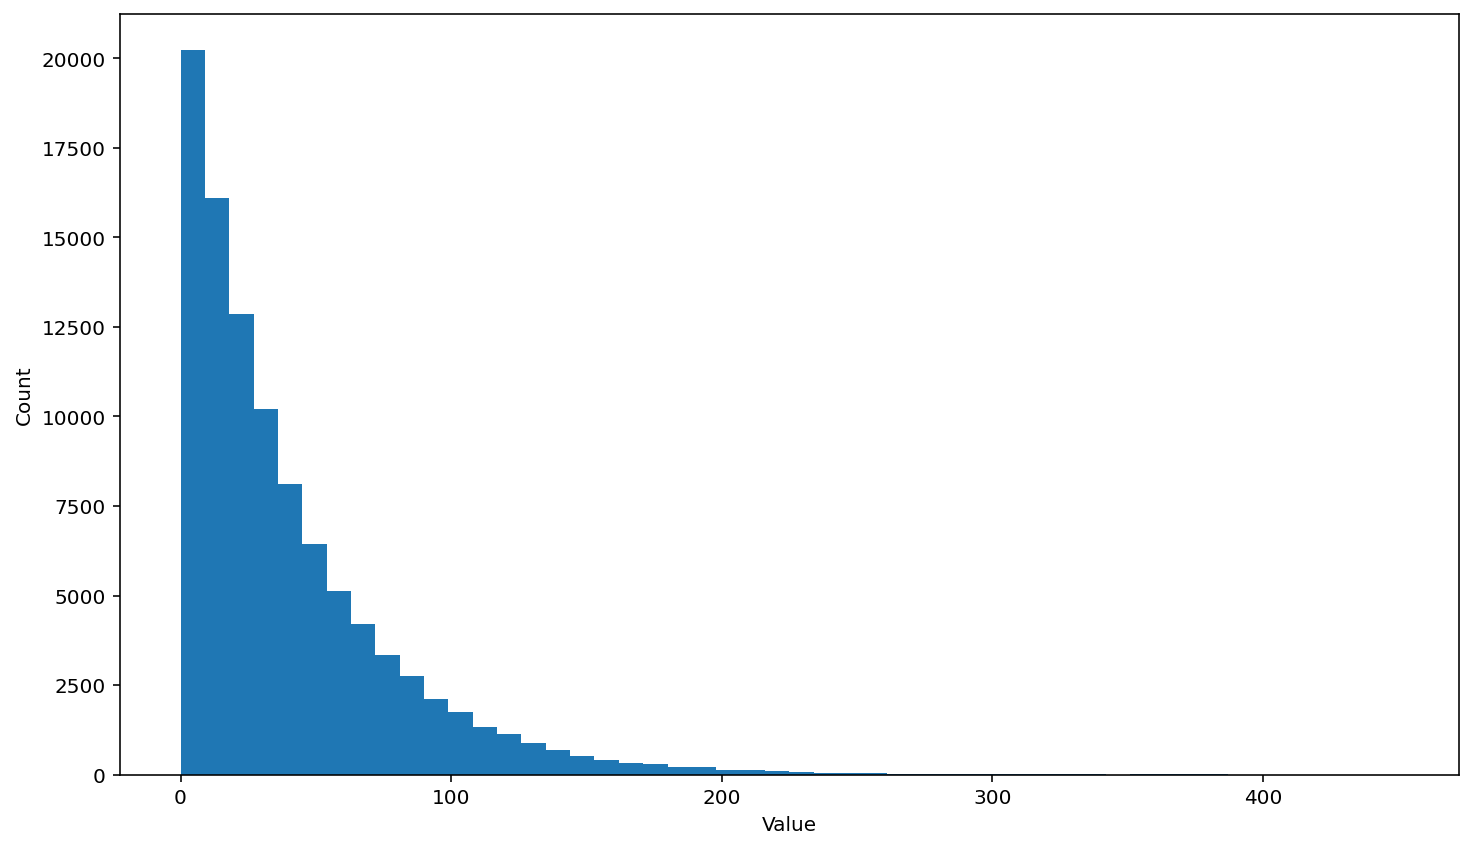

In [45]:
np.random.seed(121)
tri = np.random.exponential(40, size=100000)
n, bins, patches = plt.hist(tri, 50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

You can see that the exponential distribution drops off at a fairly steep curve, such that large values are returned much less often than smaller values. Calling the exponential distribution using a loop or using the size parameter to return a vector of values works exactly like it does with the triangular distribution.

# The Problem Description
*We will repeat this in the relevant sections in the homework file. But we strongly encourage you to read all the instructions here and think about the best ways to modularize your code. We created three functions - one to run the simulations (with any number of iterations, and with or without artifacts), one to figure profit, and one to figure probability.*

Reliable Construction wants to determine when each activity should start in a construction schedule in order to minimize the overall time it takes to construct a large commercial building. From past projects, they know that the time each task takes tends to follow a triangular distribution, where their optimistic estimate is the left (low) side of the triangle, their most likely estimate is the middle (mode) of the triangle, and their pessimistic estimate is the right (high) side of the triangle. 



| Activity  | Description  | Immediate Predecessors  | Optimistic Estimate  | Most Likely Estimate  |  Pessimistic Estimate |
|---|---|---|---|---|---|
| A  | Excavate  |  -- |   7 |  14 |  21 |
| B  | Lay the Foundation  | A  |14  | 21  | 56  |
| C  |  Put up the rough wall |  B | 42 |  63 |  126 |
| D  |  Put up the roof | C  |  28  | 35  |  70 |
| E  |  Install the exterior plumbing | C  | 7  | 28  |  35 |
| F  |  Install the interior plumbing | E  | 28  | 35  |  70 |
| G  |  Put up the exterior siding | D  | 35  | 42  | 77  |
| H  |  Do the exterior painting | E,G  |35  | 56  | 119  |
| I  |  Do the electrical work | C  |21  | 49  | 63  |
| J  |  Put up the wallboard |  F,I |  21 |  63 |  63 |
| K  |  Install the flooring |  J | 21 |  28 | 28  |
| L  |  Do the interior painting |  J | 19  |  35 | 42  |
| M  |  Install the exterior fixtures | H  | 7 | 14  | 21  |
| N  |  Install the interior fixtures | K,L | 35 | 35  | 63  |

You will:

* Generate a single-loop simulation using these estimates and the solution code to this problem from Lesson 3.
    * Use a numpy random seed of *121* at the beginning of your code cell. (If using a function, be sure to put the random seed just inside the function so it sets each time the function is called.)
    * Be sure to use int() or .astype('int') in your code to round down to integers.
* Generate a 1000-loop simulation (using the same random seed)
* Use your 1000-loop simulation results and the following information about profit to determine the average profit and the probability of completing the project in each of the three time frames
    * The base amount that Reliable will earn is \$5.4 million.
    * If Reliable completes the project in 280 days or less, they will get a bonus of \$150,000 (\$.15 million).
    * If Reliable misses the deadline of 329 days, there will be a \$25,000 (\$.025 million) penalty for each day over 329.
* Run a second 1000-loop simulation, assuming the presence of artifacts. We know the following about artifacts:
    * Artifacts increase the most likely estimate by an extra 15 days, the optimistic estimate by an extra 7 days, and the pessimistic estimate by 365 extra days.
    * Artifacts result in an extra fee, modeled with an exponential distribution with mean (scale) \$100,000.
* From this second simulation, you will again determine average profit and probability of finishing within each of the three time frames.
* Given the results of your two 1000-loop simulations and the following information you will construct a payoff table and determine if Reliable should purchase an insurance policy:
    * Artifacts are present 30% of the time.
    * The insurance policy they can buy that covers all costs as though no artifacts were found costs \$.05 million.
* Reliable can hire a consulting firm which predicts the presence of artifacts. Given the following information, you will calculate the posterior probabilities of artifacts being found/not found when predicted/not predicted, and construct a full decision tree.
    * The company accurately predicts artifacts about 86% of the time when artifacts are present. 
    * They accurately predict no artifacts about 72% of the time when no artifacts are present.
   